# Análisis de Frecuencia y la Ley de Zipf: El Patrón Oculto del Lenguaje

### Configuración e Importaciones
Preparamos las herramientas para descargar datos, procesar números (`numpy`) y graficar (`matplotlib`).

In [1]:
# Para obtener datos de texto de la web
import requests
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Instalamos tiktoken si hace falta
try:
    import tiktoken
except ImportError:
    !pip install tiktoken
    import tiktoken

# Tokenizador de GPT-4
tokenizer = tiktoken.get_encoding('cl100k_base')

### Ejercicio 1: Contando ocurrencias (Números vs Letras)

`numpy` tiene una función muy útil llamada `np.unique` para contar elementos repetidos.
Funciona genial con números, pero requiere un poco de ayuda para trabajar con texto crudo.

In [2]:
# Una introducción rápida a np.unique

nums = np.array([ 1,1,3,2,2,2,9,9,9,-1,-1,-1,-1,-1 ])

# return_counts=True nos devuelve también el conteo
uniq, counts = np.unique(nums, return_counts=True)

for n,c in zip(uniq, counts):
  print(f'El número {n} aparece {c} veces.')

El número -1 aparece 5 veces.
El número 1 aparece 2 veces.
El número 2 aparece 3 veces.
El número 3 aparece 1 veces.
El número 9 aparece 3 veces.


Ahora probemos con texto. Si le pasamos un string entero a `np.unique`, lo trata como un solo elemento.

In [3]:
# ¿Funciona también para cadenas de texto enteras?
text = 'Hello, my name is Mike and I like to eat chocolate.'
np.unique(text) # No :( (Lo ve como un solo elemento único)

array(['Hello, my name is Mike and I like to eat chocolate.'],
      dtype='<U51')

Para contar caracteres manualmente, podemos usar un conjunto (`set`) para encontrar los únicos y luego iterar para contarlos.

In [5]:
# Pero esto sí funciona:
# Convertimos a set para eliminar duplicados y ordenamos
uniq = sorted(set(text))

# Inicializamos vector de ceros
counts = np.zeros(len(uniq))

for i,u in enumerate(uniq):
  # Contamos cuántas veces aparece el caracter 'u' en el texto
  counts[i] = text.count(u)

# O usando comprensión de listas (alternativa)
# counts = [ text.count(u) for u in uniq ]

# Imprimimos resultados
for n,c in zip(uniq, counts):
  # Imprimimos qué caracter es y su frecuencia
  print(f'La letra "{n}" aparece {int(c)} veces.')

La letra " " aparece 10 veces.
La letra "," aparece 1 veces.
La letra "." aparece 1 veces.
La letra "H" aparece 1 veces.
La letra "I" aparece 1 veces.
La letra "M" aparece 1 veces.
La letra "a" aparece 4 veces.
La letra "c" aparece 2 veces.
La letra "d" aparece 1 veces.
La letra "e" aparece 6 veces.
La letra "h" aparece 1 veces.
La letra "i" aparece 3 veces.
La letra "k" aparece 2 veces.
La letra "l" aparece 4 veces.
La letra "m" aparece 2 veces.
La letra "n" aparece 2 veces.
La letra "o" aparece 4 veces.
La letra "s" aparece 1 veces.
La letra "t" aparece 3 veces.
La letra "y" aparece 1 veces.


### Ejercicio 2: Explorando la Ley de Zipf en Libros

La **Ley de Zipf** dice que si ordenas las palabras de un libro por frecuencia (la más usada primero), la frecuencia cae drásticamente siguiendo una ley de potencia (línea recta en gráfico logarítmico).

Vamos a comprobarlo descargando libros reales y graficando la frecuencia de sus **caracteres** y sus **tokens**.

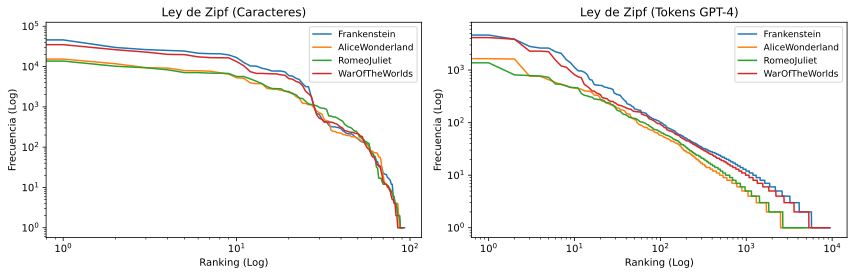

In [7]:
# Definimos las URLs de los libros (necesario para que el bucle funcione)
baseurl = 'https://www.gutenberg.org/cache/epub/'
bookurls = [['84', 'Frankenstein'], ['11', 'AliceWonderland'], ['1513', 'RomeoJuliet'], ['36', 'WarOfTheWorlds']]

# Preparamos los gráficos
_, axs = plt.subplots(1, 2, figsize=(12, 4))

for code, title in bookurls:

  # obtener el texto
  fullurl = f'{baseurl}{code}/pg{code}.txt'
  try:
      text = requests.get(fullurl).text
  except:
      continue

  # --- Ley de Zipf para CARACTERES ---
  # 1. Contamos frecuencias
  # 2. Ordenamos de Mayor a Menor (np.sort(...)[::-1])
  _, c_counts = np.unique(list(text), return_counts=True)
  counts = np.sort(c_counts)[::-1]

  # Graficamos
  axs[0].plot(counts, label=title)

  # --- Y para TOKENS (GPT-4) ---
  tokens = tokenizer.encode(text)

  # Contamos, ordenamos y graficamos
  unitokens, t_counts = np.unique(tokens, return_counts=True)
  counts_tokens = np.sort(t_counts)[::-1]

  axs[1].plot(counts_tokens, label=title)

# Ajustes de los ejes (Escala Logarítmica es clave para Zipf)
for a in axs:
  a.legend(fontsize=9)
  a.set(xscale='log', yscale='log', xlabel='Ranking (Log)', ylabel='Frecuencia (Log)')

axs[0].set_title('Ley de Zipf (Caracteres)')
axs[1].set_title('Ley de Zipf (Tokens GPT-4)')

plt.tight_layout()
plt.show()

# Análisis de Resultados: La Ley de Zipf en Acción

Las gráficas que acabamos de generar comparan cómo se distribuyen los **Caracteres** (letras individuales) frente a los **Tokens** (unidades de significado de GPT-4).

Recordemos qué es la **Ley de Zipf**: Establece que en cualquier idioma, la palabra más frecuente aparece el doble de veces que la segunda, el triple que la tercera, etc. En un gráfico logarítmico, esto se ve como una **línea recta diagonal descendente**.

### 1. Gráfico Izquierdo: Ley de Zipf (Caracteres)
* **Lo que vemos:** Una línea curva que se mantiene plana al principio y cae bruscamente al final.
* **Análisis:**
    * **No cumple la Ley de Zipf:** La línea no es una diagonal recta.
    * **¿Por qué?** El alfabeto es muy limitado (solo ~26 letras + puntuación). La letra 'e' es muy común, pero la 'a' y la 'i' también lo son mucho. No hay una diferencia exponencial entre ellas.
    * **Conclusión:** Los caracteres individuales no tienen suficiente "significado" ni variedad para formar una estructura lingüística compleja por sí solos.

### 2. Gráfico Derecho: Ley de Zipf (Tokens GPT-4)
* **Lo que vemos:** Una **línea recta casi perfecta** que desciende en diagonal.
* **Análisis:**
    * **Cumple la Ley de Zipf a la perfección:** Esto es fascinante. A pesar de que los tokens son números inventados por una máquina (BPE), se comportan estadísticamente igual que las palabras humanas naturales.
    * **La Cola Larga:** Observa el eje X (Ranking). Llega hasta $10^4$ (10,000). Esto significa que el modelo maneja eficientemente tanto las palabras ultra-comunes (como "the") como las palabras raras que aparecen una sola vez en el libro.
    * **Consistencia:** Fíjate que *todos* los libros (Frankenstein, Romeo y Julieta, etc.) siguen exactamente la misma pendiente. Esto demuestra que la estructura del inglés es universal, sin importar el autor.

### Resumen para tu Proyecto
Esta gráfica confirma que **GPT-4 no "lee" letra por letra**. Si lo hiciera, su "cerebro" vería la gráfica de la izquierda (ruido). En cambio, GPT-4 "lee" tokens, lo que le permite ver la estructura profunda y jerárquica del lenguaje (la gráfica de la derecha), haciendo que su procesamiento sea mucho más cercano a cómo entendemos las palabras los humanos.